<a href="https://colab.research.google.com/github/kiplangat-david/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**SENTIMENT ANALYSIS**##

Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations.

Sentiment analysis is used to discover people's opinions, emotions and feelings about a product or service

The ability to extract insights from this type of data is a practice that is widely adopted by many organizations across the world. It's applications are broad and powerful,e.g:
  - what do people think about the latest iphone?
  - is that movie worth watching?
  - what is the best aspect of this product?

We can broadly divide the problems in sentiment analyis into 3 categories.
  1. Text polarity refers to identifying if sentiment is positive or negative
  2. Sentiment rating give a numerical rank for text
  3. Aspect Based Sentiment Analysis determines the sentiment towards specific aspects in texts

  Here we will focus on tweets sentimental analysis

##**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

##**Read Data**

In [ ]:

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


- label is whether it's positive or not. 
    - 0(positive)
    - 1(negative)
- tweet is the text of the tweet itself

In [ ]:
#how many rows and columns do we have?
train.shape

##missing values

In [ ]:
#EDA
#MISSING VALUE TREATMENT
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

How many positive tweets compared to negative tweets?

In [ ]:
train.label.value_counts()

We can also visualize this in a pie chart

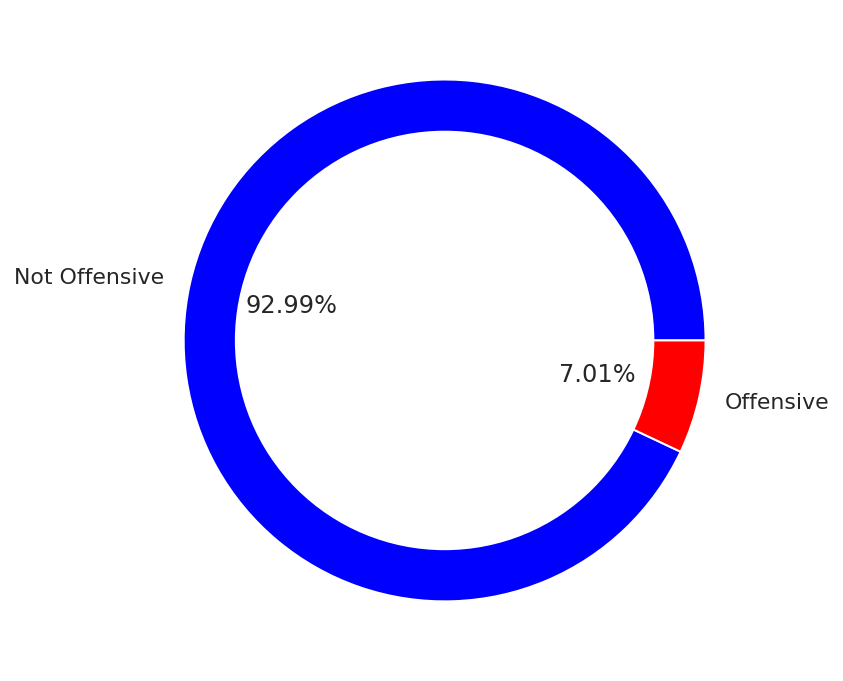

In [ ]:
plt.figure(figsize=(6, 6))

# Creates pie chart
plt.pie(
    train["label"].value_counts(),
    autopct = "%.2f%%",
    labels = ["positive", "negative"],
    colors = ["blue", "red"]
)

# Creates circle
circle = plt.Circle((0,0), 0.80,fc='white')

# Adds circle object to the existing figure (pie chart)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.show()

In [ ]:
# Positive tweet
print('Positive Tweet example:',
      train[train['label'] == '0']['tweet'])

# Negative tweet
print('Negative Tweet example:',
      train[train['label'] == '1']['tweet'])

Positive Tweet example: Series([], Name: tweet, dtype: object)
Negative Tweet example: Series([], Name: tweet, dtype: object)


##**Train our Algorithm**

**Vectorize our tweets**

Create a *TfidfVectorizer* and use it to vectorize our tweets. We will use *max_features* to only take a selection of terms

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(train.tweet)
words_train = pd.DataFrame(vectors.toarray(), columns= vectorizer.get_feature_names())
words_train.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,06,10,100,11,12,13,15,16,1st,20,2016,2017,24,2nd,30,3d,50,able,about,account,act,actor,actually,adapt,adventure,affirmation,affirmations,after,afternoon,again,against,ago,agree,ahead,all,allahsoil,almost,alone,along,...,wonderful,word,words,work,working,workout,world,worst,would,wow,writing,wrong,wtf,xxx,yay,yeah,year,years,yes,yesterday,yet,yo,yoga,york,you,young,your,yourself,youtube,yummy,ªð,³ð,µð,¹ð,ºï,ºð,¼ð,½ð,¾ð,ó¾
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.638475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301336,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##**Setting up our variables**##

we will create two variables, X and y
  - X(all our features)
  - y(labels - the positive or negative). we will use 'label' column for this 

In [ ]:
#setting up our variables x,y
X = words_train
y = train.label

In [ ]:
#picking an algorithm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

Now let's train our model.

We will do this by using LogisticRegression,RandomForestClassifier,SVM and MultinomialNB algorithms

In [ ]:
%%time
#create and train logistic regresson
logreg = LogisticRegression(C=1e9, solver='lbfgs', max_iter=1000)
logreg.fit(X,y)

CPU times: user 1min 34s, sys: 4.89 s, total: 1min 39s
Wall time: 51.1 s


In [ ]:
#create and train random forest
forest = RandomForestClassifier(n_estimators=50)
forest.fit(X,y)

RandomForestClassifier(n_estimators=50)

In [ ]:
#svm
svc = LinearSVC()
svc.fit(X,y)

LinearSVC()

In [ ]:
#multinommialNB
bayes = MultinomialNB()
bayes.fit(X,y)

MultinomialNB()

##**Prediction**##

Now we are going to make predictions using all our models

In [ ]:
#prediction
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


**vectorize test into numbers so the algorithm can understand them**



In [ ]:

print(vectorizer.get_feature_names)

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(max_features=1000)>


In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(test.tweet)
words_test = pd.DataFrame(vectors.toarray(), columns= vectorizer.get_feature_names())
words_test.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,06,10,100,11,12,15,16,17,18,1st,20,2016,24,30,50,able,about,absolutely,abt,account,act,actually,adapt,add,adventure,affirmation,affirmations,after,again,against,ago,agree,ahead,aist,all,allahsoil,almost,alone,along,...,women,won,wonder,wonderful,word,words,work,working,world,worst,would,wow,wrong,wtf,xxx,ya,yay,yeah,year,years,yes,yesterday,yet,yo,yoga,you,young,your,yours,yourself,youtube,ªð,¹ð,ºï,ºð,¼ð,½ï,½ð,¾ð,ó¾
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.241474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300114,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.320417,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#predict using all models
#llogistic prediction + probabilities
test['pred_logreg'] = logreg.predict(words_test)
test['predict_logreg_prob'] = logreg.predict_proba(words_test)[:,1]

#randomforest prediction + probabilities
test['pred_forest'] = forest.predict(words_test)
test['predict_forest_prob'] = forest.predict_proba(words_test)[:,1]

#svc predictions
test['pred_svc'] = svc.predict(words_test)

#bayes predictions + probabilities
test['pred_bayes'] = bayes.predict(words_test)
test['predict_bayes_prob'] = bayes.predict_proba(words_test)[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 17
- 18
- absolutely
- abt
- add
- ...
Feature names seen at fit time, yet now missing:
- 13
- 2017
- 2nd
- 3d
- actor
- ...

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 17
- 18
- absolutely
- abt
- add
- ...
Feature names seen at fit time, yet now missing:
- 13
- 2017
- 2nd
- 3d
- actor
- ...

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time

##**Testing our models**

We will test our models and see which model performs the best. We can do this by doing train,test split and see if the predictions match the actual labels

In [ ]:
print(test)

          id  ... predict_bayes_prob
0      31963  ...           0.027531
1      31964  ...           0.028632
2      31965  ...           0.029303
3      31966  ...           0.010527
4      31967  ...           0.016970
...      ...  ...                ...
17192  49155  ...           0.179981
17193  49156  ...           0.075251
17194  49157  ...           0.049751
17195  49158  ...           0.044056
17196  49159  ...           0.019777

[17197 rows x 9 columns]


In [ ]:
%%time
#Test our models
#use train test split and see if the predictions match the actual labels
train.head()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)



logreg.fit(X_train,y_train)
forest.fit(X_train,y_train)
svc.fit(X_train,y_train)
bayes.fit(X_train,y_train)

CPU times: user 1min 41s, sys: 3.31 s, total: 1min 45s
Wall time: 1min 16s


##**Model evaluation**##

Here we will use *Confusion_matrix* and *Classification_report*

In [ ]:
#confusion matrix - to see how well they did
from sklearn.metrics import confusion_matrix,classification_report
#logistic
y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print('Confusion Matrix Results\n',cm)
print('Classification Report\n',cr)

Confusion Matrix Results
 [[5884   88]
 [ 243  178]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      5972
           1       0.67      0.42      0.52       421

    accuracy                           0.95      6393
   macro avg       0.81      0.70      0.75      6393
weighted avg       0.94      0.95      0.94      6393



In [ ]:
#forest
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print('Confusion Matrix Results\n',cm)
print('Classification Report\n',cr)

Confusion Matrix Results
 [[5944   28]
 [ 264  157]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      5972
           1       0.85      0.37      0.52       421

    accuracy                           0.95      6393
   macro avg       0.90      0.68      0.75      6393
weighted avg       0.95      0.95      0.95      6393



In [ ]:
#svc
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print('Confusion Matrix Results\n',cm)
print('Classification Report\n',cr)

Confusion Matrix Results
 [[5930   42]
 [ 266  155]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      5972
           1       0.79      0.37      0.50       421

    accuracy                           0.95      6393
   macro avg       0.87      0.68      0.74      6393
weighted avg       0.95      0.95      0.94      6393



In [ ]:
#bayes
y_pred = bayes.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print('Confusion Matrix Results\n',cm)
print('Classification Report\n',cr)

Confusion Matrix Results
 [[5958   14]
 [ 343   78]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5972
           1       0.85      0.19      0.30       421

    accuracy                           0.94      6393
   macro avg       0.90      0.59      0.64      6393
weighted avg       0.94      0.94      0.93      6393

